In [3]:
#Package imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cycler
import seaborn as sns
plt.style.use('./paper.mplstyle.py')

In [77]:
def resultsPanel_exp(dfExp, dfErr, labels, varyCondition, rep):   
    '''Purpose: Plot selected readout time courses
    
       Input: 
            dfSim: df containing the simulated data
            dfExp: df containing the experimental data
            dfErr: df containing the measurement error associated with the experimental data
            labels: list of lists containing the condition labels to be plotted
            varyCondition: string contraining the label of the condition that is sweeped over in the plot
   
       Output: none
        
       Plots: MODELING OBJECTIVE ' + str(objective) + '.svg' - 
                Plot of readout dynamics associated with the given modeling objective 
    '''
    
    fig = plt.figure(figsize = (12,3.5))
    fig.subplots_adjust(wspace=0.1, hspace=0.1)
    ax1 = plt.subplot(131)   
    ax2 = plt.subplot(132)
    ax3 = plt.subplot(133)

    def grabData(labels):
#         drop_labels_error = [[5.0, 10.0, 0.001, 1, 90], [1.0, 2.5, 0.001, 10.0, 90.0], [20.0, 10.0, 0.001, 1.0, 90.0], [5.0, 0.5, 0.005, 10.0, 90.0], [20.0, 0.5, 0.005, 1.0, 90.0], [1.0, 2.5, 0.001, 1.0, 90.0], [20.0, 0.5, 0.005, 10.0, 90.0]]
        drop_labels_no_triplicate =[[20.0, 10.0, 0.001, 10.0, 90.0], [20.0, 10.0, 0.001, 0.0, 90.0], [5.0, 2.5, 0.001, 0.0, 90.0]]
        drop_labels_error = [[0., 0.]]
    
        count = 0
        
        if rep == 'rep1':
            maxVal = 0.6599948235700113
        elif rep == 'rep2':
            maxVal = 2.94995531724754
        elif rep == 'rep3':
            maxVal = 3. #CHANGE WHEN I GET THE DATA

        exp =  [1,1,1]
        for (columnName, columnData) in dfExp.iteritems():
            label = list(columnData.iloc[0])
            time = np.linspace(0, 240, 61)
            
            if rep == 'rep1':
                if label == labels[0]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        exp[0] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        exp[0] = [i/maxVal for i in t_course]
                elif label == labels[1]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        exp[1] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        exp[1] = [i/maxVal for i in t_course]
                elif label == labels[2]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        exp[2] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        exp[2] = [i/maxVal for i in t_course]
            
            elif rep == 'rep2' or rep == 'rep3':    
                if label == labels[0]:
                    t_course = columnData.iloc[1:]
                    exp[0] = [i/maxVal for i in t_course]
                elif label == labels[1]:
                    t_course = columnData.iloc[1:]
                    exp[1] = [i/maxVal for i in t_course]
                elif label == labels[2]:
                    t_course = columnData.iloc[1:]
                    exp[2] = [i/maxVal for i in t_course]
        
        err =  [1,1,1]
        for (columnName, columnData) in dfErr.iteritems():
            label = list(columnData.iloc[0])
#             time = np.linspace(0, 240, 61)
           
            if rep == 'rep1':
                if label == labels[0]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        err[0] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        err[0] = [i/maxVal for i in t_course]
                elif label == labels[1]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        err[1] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        err[1] = [i/maxVal for i in t_course]
                elif label == labels[2]:
                    if label in drop_labels_error or label in drop_labels_no_triplicate:
                        t_course = [0] * 61
                        err[2] = t_course
                    else:
                        t_course = columnData.iloc[1:]
                        err[2] = [i/maxVal for i in t_course]
                        
            elif rep == 'rep2' or rep == 'rep3':
                if label == labels[0]:
                    t_course = columnData.iloc[1:]
                    err[0] = [i/maxVal for i in t_course]
                elif label == labels[1]:
                    t_course = columnData.iloc[1:]
                    err[1] = [i/maxVal for i in t_course]
                elif label == labels[2]:
                    t_course = columnData.iloc[1:]
                    err[2] = [i/maxVal for i in t_course]

        return exp, err

    if varyCondition == 'T7':
#         varyIndex = 0
        vals = [1.0, 5.0, 20.0]
        colors = ['lightgreen', 'mediumseagreen', 'darkgreen']    
    elif varyCondition == 'RT':
#         varyIndex = 1
        vals = [0.5, 2.5, 10.0]
        colors = ['lightsteelblue', 'royalblue', 'midnightblue']
    elif varyCondition == 'RNase':
#         varyIndex = 2
        vals = [0.001, 0.005, 0.02]
        colors = ['lightcoral', 'red', 'maroon']
        
    time = np.linspace(0, 240, 61)
    
    exp0, err0 = grabData(labels)
    for i in range(0, len(exp0)):
        list_exp = exp0[i]
        list_err = err0[i]
        upper_y = []
        lower_y = []
        for j, val in enumerate(list_exp):
            upper_y.append(val + list_err[j])
            lower_y.append(val - list_err[j])

        ax1.fill_between(time, lower_y, upper_y, alpha = .2, color = colors[i])
        ax1.plot(time, exp0[i],  marker = None, linestyle = 'solid', color = colors[i], label=varyCondition+' '+str(vals[i]))
        ax1.set_xscale('linear')
    
    ax1.set_xlabel('Time (min)')
    ax1.set_ylabel('Normalized exp output')
    ax1.legend()
    ax1.set_title('vRNA = 0fM', fontsize = 10, fontweight = 'bold')
    ax1.set_box_aspect(1)

    
    for i in range(0, len(labels)):
        labels[i][3] = 1
    
    exp1, err1 = grabData(labels)
    for i in range(0, len(exp1)):
        list_exp = exp1[i]
        list_err = err1[i]
        upper_y = []
        lower_y = []
        for j, val in enumerate(list_exp):
            upper_y.append(val + list_err[j])
            lower_y.append(val - list_err[j])

        ax2.fill_between(time, lower_y, upper_y, alpha = .2, color = colors[i])
        ax2.plot(time, exp1[i],  marker = None, linestyle = 'solid', color = colors[i], label=varyCondition+' '+str(vals[i]))
        ax2.set_xscale('linear')
    
    ax2.set_xlabel('Time (min)')
    ax2.set_ylabel('Normalized exp output')
    ax2.legend()
    ax2.set_title('vRNA = 1fM', fontsize = 10, fontweight = 'bold')
    ax2.set_box_aspect(1)

    for i in range(0, len(labels)):
        labels[i][3] = 10
    
    exp10, err10 = grabData(labels)
        
    for i in range(0, len(exp10)):
        list_exp = exp10[i]
        list_err = err10[i]
        upper_y = []
        lower_y = []
        for j, val in enumerate(list_exp):
            upper_y.append(val + list_err[j])
            lower_y.append(val - list_err[j])

        ax3.fill_between(time, lower_y, upper_y, alpha = .2, color = colors[i])
        ax3.plot(time, exp10[i],  marker = None, linestyle = 'solid', color = colors[i], label=varyCondition+' '+str(vals[i]))
        ax3.set_xscale('linear')
    
    ax3.set_xlabel('Time (min)')
    ax3.legend()
    ax3.set_title('vRNA = 10fM', fontsize = 10, fontweight = 'bold')
    ax3.set_box_aspect(1)

    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, 1)
    ax3.set_ylim(0, 1)
    fig.suptitle(varyCondition + '_Sweep_Cas13=' + str(labels[-1][-1]) +  ' ' + rep, fontsize = 12, fontweight = 'bold')
#     plt.show()
    plt.savefig(varyCondition + '_Sweep_Cas13=' + str(labels[-1][-1]) + '_' + rep + '.svg', dpi = 600, bbox_inches="tight")

In [78]:
#T7 sweep at low RT (0.5)

def sweeps_exp(
    df_data,
    df_error,
    rep,
    cas,
    RT_sweep_doses,
    T7_sweep_doses,
    RNase_sweep_doses
):
    '''Purpose: Plot selected readout time courses for objectives 4, 5, and 6
       Output: none
       Plots: None
    '''
    def RT_sweep(T7_dose, RNase_dose):
        if T7_dose == 'low':
            T7 = 1.0
        elif T7_dose == 'mid':
            T7 = 5.0
        elif T7_dose == 'high':
            T7 = 20.0

        if RNase_dose == 'low':
            RNase = 0.001
        elif RNase_dose == 'mid':
            RNase = 0.005
        elif RNase_dose == 'high':
            RNase = 0.02


        labels = [[T7, 0.5, RNase, 0, cas], [T7, 2.5, RNase, 0, cas], [T7, 10.0, RNase, 0, cas]]
        varyCondition = 'RT'
        resultsPanel_exp(df_data, df_error, labels, varyCondition, rep) 

    def T7_sweep(RT_dose, RNase_dose):
        if RT_dose == 'low':
            RT = 0.5
        elif RT_dose == 'mid':
            RT = 2.5
        elif RT_dose == 'high':
            RT = 10.0

        if RNase_dose == 'low':
            RNase = 0.001
        elif RNase_dose == 'mid':
            RNase = 0.005
        elif RNase_dose == 'high':
            RNase = 0.02


        labels = [[1.0, RT, RNase, 0, cas], [5.0, RT, RNase, 0, cas], [20.0, RT, RNase, 0, cas]]
        varyCondition = 'T7'
        resultsPanel_exp(df_data, df_error, labels, varyCondition, rep) 

    def RNase_sweep(RT_dose, T7_dose):
        if RT_dose == 'low':
            RT = 0.5
        elif RT_dose == 'mid':
            RT = 2.5
        elif RT_dose == 'high':
            RT = 10.0

        if T7_dose == 'low':
            T7 = 1.0
        elif T7_dose == 'mid':
            T7 = 5.0
        elif T7_dose == 'high':
            T7 = 20.0

        labels = [[T7, RT, 0.001, 0, cas], [T7, RT, 0.005, 0, cas], [T7, RT, 0.02, 0, cas]]
        varyCondition = 'RNase'
        resultsPanel_exp(df_data, df_error, labels, varyCondition, rep)
        
    RT_sweep(RT_sweep_doses[0], RT_sweep_doses[1])
    T7_sweep(T7_sweep_doses[0], T7_sweep_doses[1])
    RNase_sweep(RNase_sweep_doses[0], RNase_sweep_doses[1])


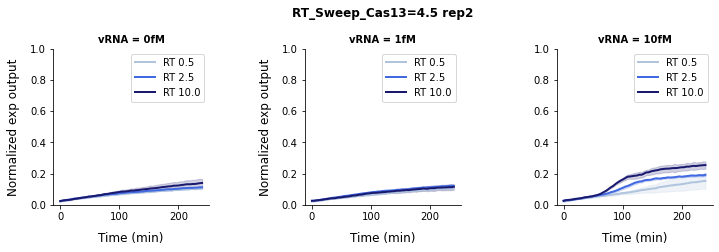

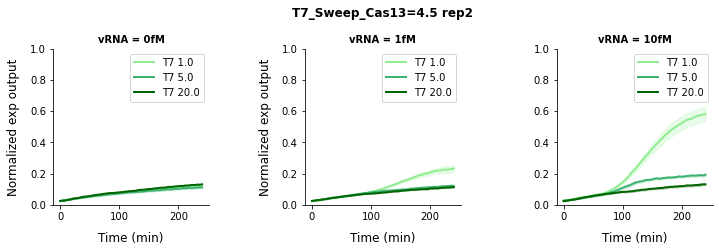

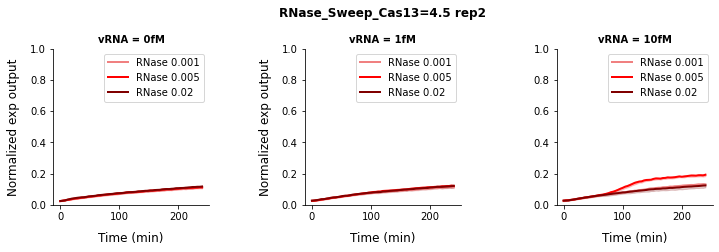

In [79]:
path = '/Users/kdreyer/Desktop/Github/COVID_Dx_GAMES/'
fname_rep1_data = 'PROCESSED_DATA_rep1_fix_EXP.pkl'
fname_rep1_err = 'PROCESSED_DATA_rep1_fix_ERR.pkl'
df_data_rep1 = pd.read_pickle(path + fname_rep1_data)
df_error_rep1 = pd.read_pickle(path + fname_rep1_err)
RT_sweep_doses = ['mid', 'mid']
T7_sweep_doses = ['mid', 'mid']
RNase_sweep_doses = ['mid', 'mid']

# sweeps_exp(
#     df_data_rep1,
#     df_error_rep1,
#     'rep1',
#     90,
#     RT_sweep_doses,
#     T7_sweep_doses,
#     RNase_sweep_doses
# )

# sweeps_exp(
#     df_data_rep1,
#     df_error_rep1,
#     'rep1',
#     4.5,
#     RT_sweep_doses,
#     T7_sweep_doses,
#     RNase_sweep_doses
# )

fname_rep2_data = 'PROCESSED_DATA_rep2_EXP.pkl'
fname_rep2_err = 'PROCESSED_DATA_rep2_ERR.pkl'
df_data_rep2 = pd.read_pickle(path + fname_rep2_data)
df_error_rep2 = pd.read_pickle(path + fname_rep2_err)

# sweeps_exp(
#     df_data_rep2,
#     df_error_rep2,
#     'rep2',
#     90,
#     RT_sweep_doses,
#     T7_sweep_doses,
#     RNase_sweep_doses
# )

# sweeps_exp(
#     df_data_rep2,
#     df_error_rep2,
#     'rep2',
#     4.5,
#     RT_sweep_doses,
#     T7_sweep_doses,
#     RNase_sweep_doses
# )

## SF16a

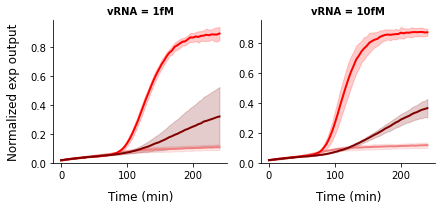

In [4]:
T7_dose = 'low'
RT_dose = 'low'
RNase_sweep(RT_dose, T7_dose)

## SF16b

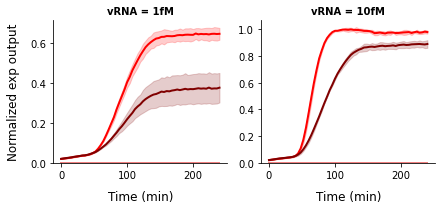

In [7]:
T7_dose = 'low'
RT_dose = 'mid'
RNase_sweep(RT_dose, T7_dose)

## SF16c

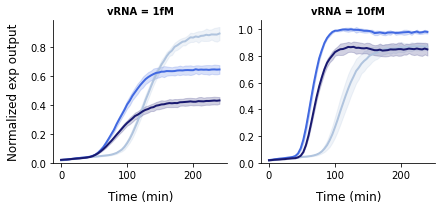

In [8]:
T7_dose = 'low'
RNase_dose = 'mid'
RT_sweep(T7_dose, RNase_dose)  

### Outdated

In [ ]:
T7_dose = 'high'
RNase_dose = 'high'
RT_dose = 'high'
RT_sweep(T7_dose, RNase_dose)  
T7_sweep(RT_dose, RNase_dose)
RNase_sweep(RT_dose, T7_dose)

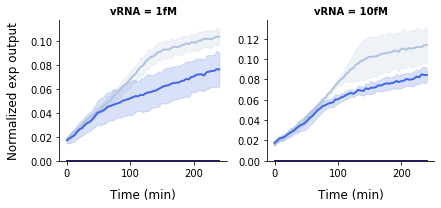

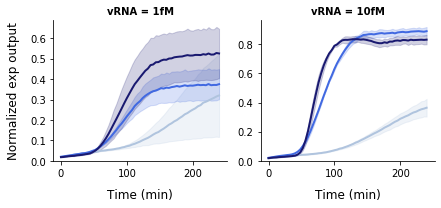

In [4]:
T7_dose = 'high'
RNase_dose = 'low'
RT_sweep(T7_dose, RNase_dose)  

T7_dose = 'low'
RNase_dose = 'high'
RT_sweep(T7_dose, RNase_dose)  



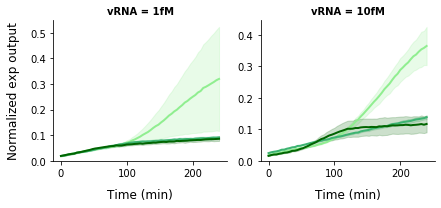

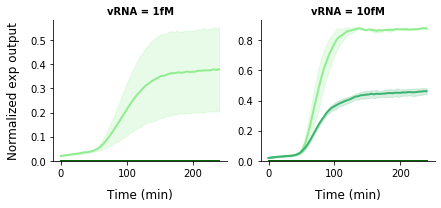

In [5]:
RNase_dose = 'high'
RT_dose = 'low'
T7_sweep(RT_dose, RNase_dose)

RNase_dose = 'low'
RT_dose = 'high'
T7_sweep(RT_dose, RNase_dose)


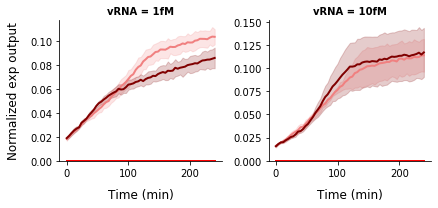

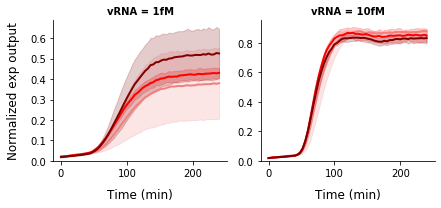

In [6]:
T7_dose = 'high'
RT_dose = 'low'
RNase_sweep(RT_dose, T7_dose)

T7_dose = 'low'
RT_dose = 'high'
RNase_sweep(RT_dose, T7_dose)